In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

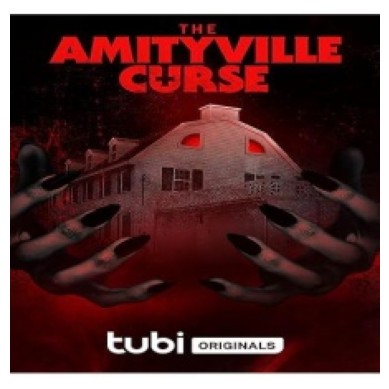

In [3]:
# import images from ~/Downloads/archive/four_genre_posters_updated/four_genre_posters_updated/Horror/
import os
from PIL import Image
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = Image.open(img_path)
            images.append(img)
    return images

folder_path = '/home/margotte/Downloads/archive/four_genre_posters_updated/four_genre_posters_updated/Horror/'
images = load_images_from_folder(folder_path)
# Display the first image
if images:
    plt.imshow(images[0])
    plt.axis('off')  # Hide axes
    plt.show()
else:
    print("No images found in the specified folder.")

In [ ]:
# Display the number of images loaded
print(f"Number of images loaded: {len(images)}")
# Display the size of the first image
if images:
    print(f"Size of the first image: {images[0].size}")
else:
    print("No images to display size for.")


Number of images loaded: 358
Size of the first image: (224, 224)


In [5]:
# transform the images to numpy arrays
images_np = [np.array(img) for img in images]
# Display the shape of the first image array
if images_np:
    print(f"Shape of the first image array: {images_np[0].shape}")
else:
    print("No images to display shape for.")
# Display the first image as a numpy array
if images_np:
    print(f"First image as numpy array:\n{images_np[0]}")
else:
    print("No images to display as numpy array.")

Shape of the first image array: (224, 224, 3)
First image as numpy array:
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 253 254]
  [255 253 254]
  [255 253 254]]

 ...

 [[255 253 252]
  [254 253 251]
  [255 252 251]
  ...
  [253 252 248]
  [255 251 248]
  [254 250 247]]

 [[255 253 254]
  [254 254 254]
  [255 253 254]
  ...
  [254 254 252]
  [255 254 252]
  [255 254 252]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 255 255]
  [255 255 255]
  [255 255 255]]]


Size of the first resized image: (64, 64)


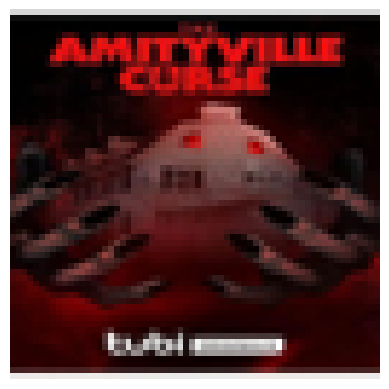

In [6]:
# change the size of the images to 64x64
images_resized = [img.resize((64, 64)) for img in images]
# Display the size of the first resized image
if images_resized:
    print(f"Size of the first resized image: {images_resized[0].size}")
else:
    print("No images to display size for after resizing.")
# Display the first resized image
if images_resized:
    plt.imshow(images_resized[0])
    plt.axis('off')  # Hide axes
    plt.show()

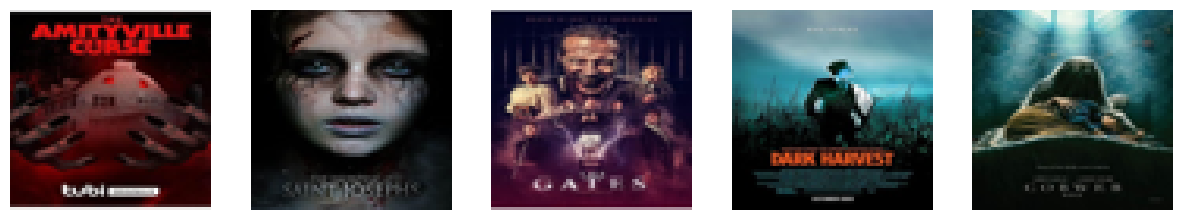

In [7]:
#show the first 5 images
if len(images_resized) >= 5:
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    for i in range(5):
        axes[i].imshow(images_resized[i])
        axes[i].axis('off')  # Hide axes
    plt.show()
    

In [8]:
# transform the resized images to numpy arrays
images_resized_np = [np.array(img) for img in images_resized]

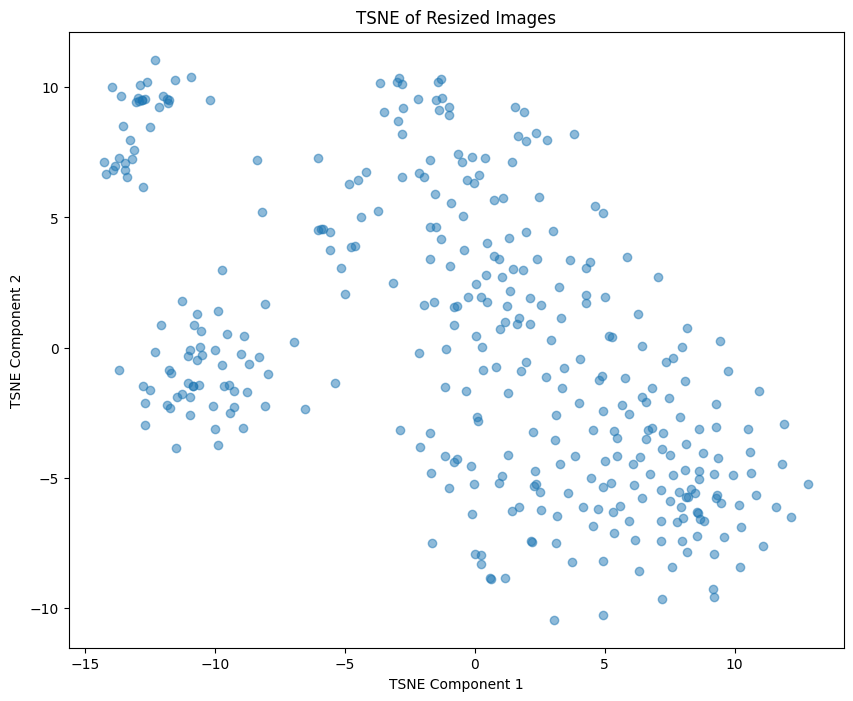

In [11]:
# plot the dataset with TSNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
images_resized_flat = np.array([img.flatten() for img in images_resized_np])
images_tsne = tsne.fit_transform(images_resized_flat)

# plot the TSNE results
images_tsne = np.array(images_tsne)  # Ensure images_tsne is a NumPy array
plt.figure(figsize=(10, 8))
plt.scatter(images_tsne[:, 0], images_tsne[:, 1], alpha=0.5)
plt.title('TSNE of Resized Images')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()

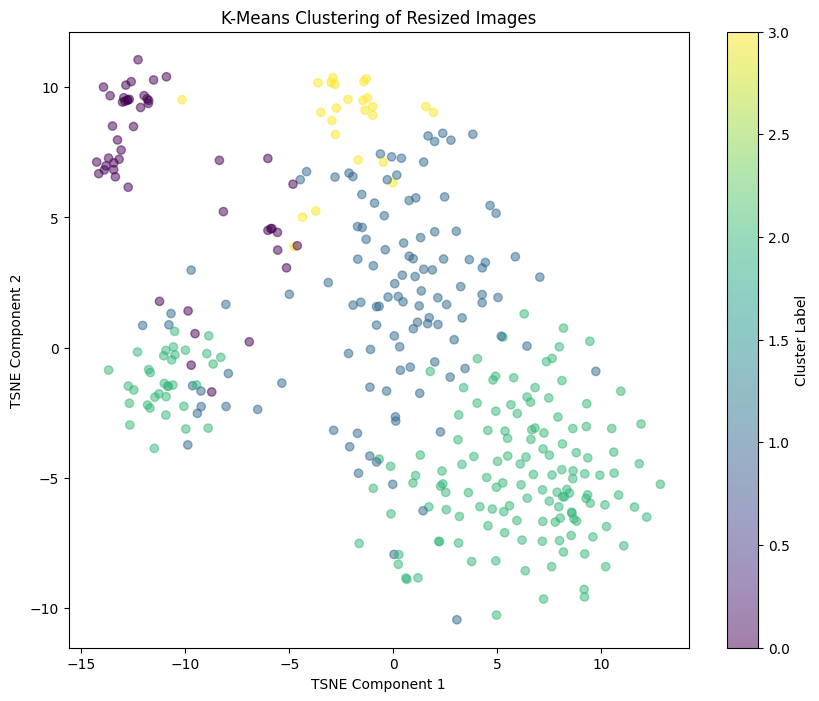

In [25]:
# apply k-means clustering with k = 4
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(images_resized_flat)
# plot the k-means clustering results
plt.figure(figsize=(10, 8))
plt.scatter(images_tsne[:, 0], images_tsne[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering of Resized Images')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

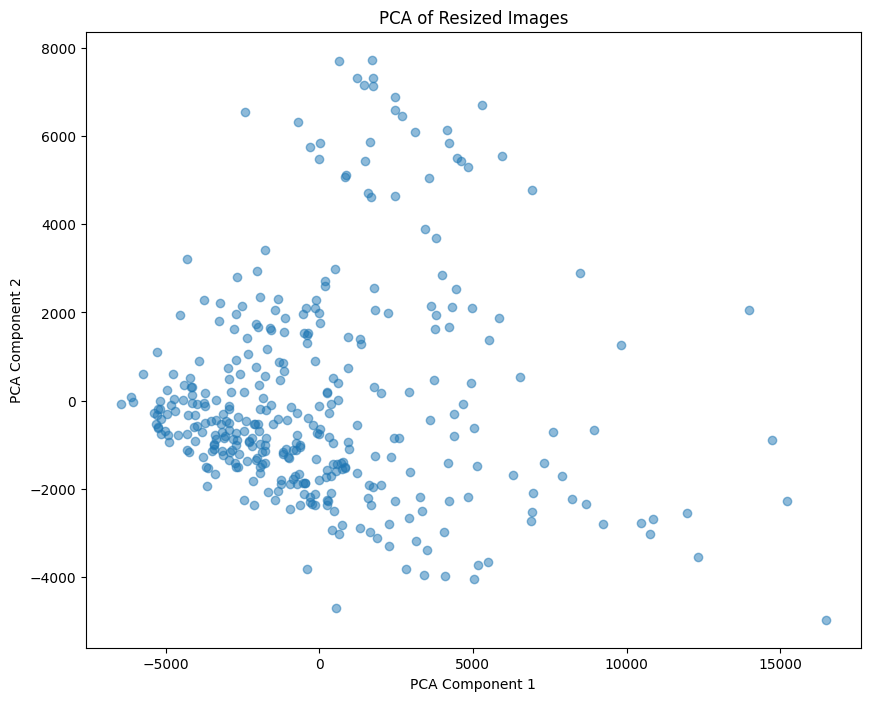

In [26]:
# visualize with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
images_pca = pca.fit_transform(images_resized_flat)
# plot the PCA results
plt.figure(figsize=(10, 8))
plt.scatter(images_pca[:, 0], images_pca[:, 1], alpha=0.5)
plt.title('PCA of Resized Images')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

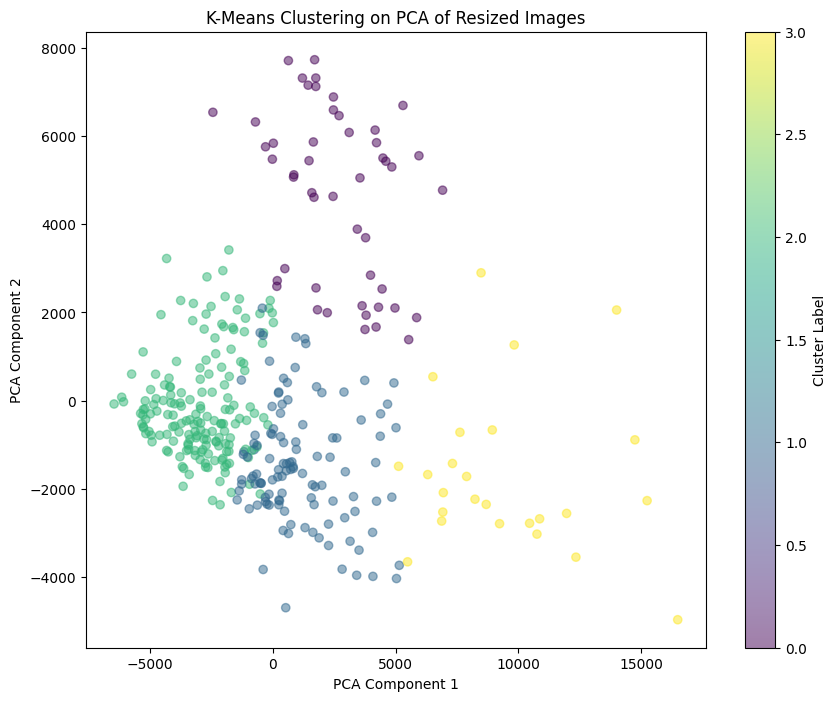

In [27]:
# plot kmeans clustering results on PCA
plt.figure(figsize=(10, 8))
plt.scatter(images_pca[:, 0], images_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering on PCA of Resized Images')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

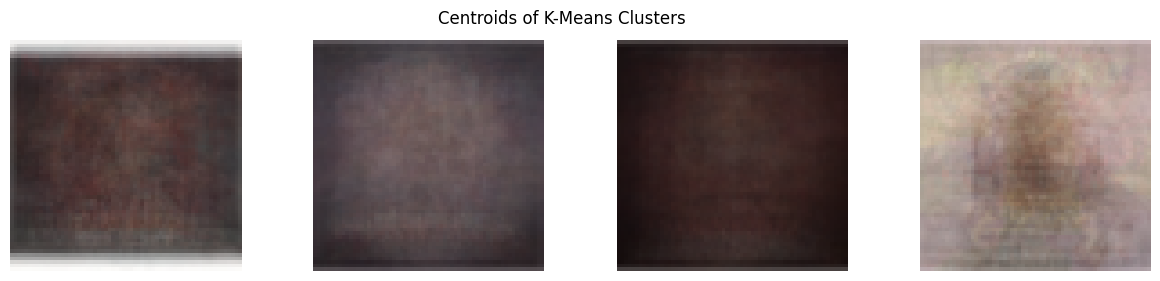

In [28]:
# show the centroids of the clusters
centroids = kmeans.cluster_centers_
centroids_images = centroids.reshape(-1, 64, 64, 3)
fig, axes = plt.subplots(1, len(centroids_images), figsize=(15, 3))
for i in range(len(centroids_images)):
    axes[i].imshow(centroids_images[i].astype(np.uint8))
    axes[i].axis('off')  # Hide axes
plt.suptitle('Centroids of K-Means Clusters')
plt.show()

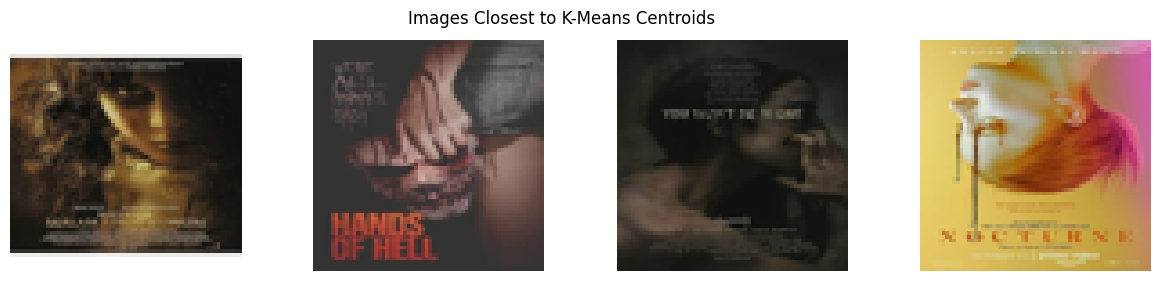

In [29]:
#show the images closest to the centroids
from sklearn.metrics import pairwise_distances_argmin_min
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, images_resized_flat)
fig, axes = plt.subplots(1, len(closest), figsize=(15, 3))
for i, idx in enumerate(closest):
    axes[i].imshow(images_resized[idx])
    axes[i].axis('off')  # Hide axes
plt.suptitle('Images Closest to K-Means Centroids')
plt.show()

In [34]:
data_profit = pd.read_csv("movie_profit.csv")
data_profit.shape

(3401, 9)

In [35]:
data_horror = data_profit[data_profit["genre"] == "Horror"]

In [36]:
# remove unnamed, genre column
data_horror = data_horror.drop(columns=["Unnamed: 0", "genre"])
data_horror.dropna(inplace=True)
data_horror.shape

(266, 7)

In [39]:
data_horror.reset_index(inplace=True, drop=True)
movie_title = data_horror["movie"]
data_horror = data_horror.drop(columns=["movie"])

In [40]:
data_horror

,release_date,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating
0,12/14/2007,150000000.0,256393010.0,585532684.0,Warner Bros.,PG-13
1,2/12/2010,150000000.0,62189884.0,142634358.0,Universal,R
2,5/19/2017,97000000.0,74262031.0,238521247.0,20th Century Fox,R
3,8/4/2000,90000000.0,73209340.0,191200000.0,Sony Pictures,R
4,2/9/2001,87000000.0,165092266.0,350100280.0,MGM,R
...,...,...,...,...,...,...
261,7/14/1999,600000.0,140539099.0,248300000.0,Artisan,R
262,9/25/2009,450000.0,107918810.0,194183034.0,Paramount Pictures,R
263,12/10/2004,400000.0,31425.0,31425.0,Indican Pictures,R
264,10/13/2005,400000.0,423.0,423.0,Freestyle Releasing,R


In [41]:
# one hot encoder for distributor categorial variable
data_horror = pd.get_dummies(data_horror, columns=["distributor"], drop_first=True)

# convert mpaa_rating to numerical values
rating_mapping = {"G": 0, "PG": 1, "PG-13": 2, "R": 3, "NC-17": 4}
data_horror["mpaa_rating"] = data_horror["mpaa_rating"].map(rating_mapping)

import datetime
# convert release_date to numerical values (number of days since 1900-01-01)
data_horror["release_date"] = pd.to_datetime(data_horror["release_date"], errors='coerce')
base_date = datetime.datetime(1900, 1, 1)
data_horror["release_date"] = (data_horror["release_date"] - base_date).dt.days

data_horror

,release_date,production_budget,domestic_gross,worldwide_gross,mpaa_rating,distributor_A24,distributor_Anchor Bay Entertai…,distributor_Artisan,distributor_BH Tilt,distributor_Broad Green Pictures,...,distributor_The Bubble Factory,distributor_Third Rail,distributor_Trimark,distributor_USA Films,distributor_United Artists,distributor_Universal,distributor_Walt Disney,distributor_Warner Bros.,distributor_Weinstein/Dimension,distributor_Weinstein Co.
0,39428,150000000.0,256393010.0,585532684.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,40219,150000000.0,62189884.0,142634358.0,3,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,42872,97000000.0,74262031.0,238521247.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,36740,90000000.0,73209340.0,191200000.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,36929,87000000.0,165092266.0,350100280.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,36353,600000.0,140539099.0,248300000.0,3,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
262,40079,450000.0,107918810.0,194183034.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
263,38329,400000.0,31425.0,31425.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
264,38636,400000.0,423.0,423.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


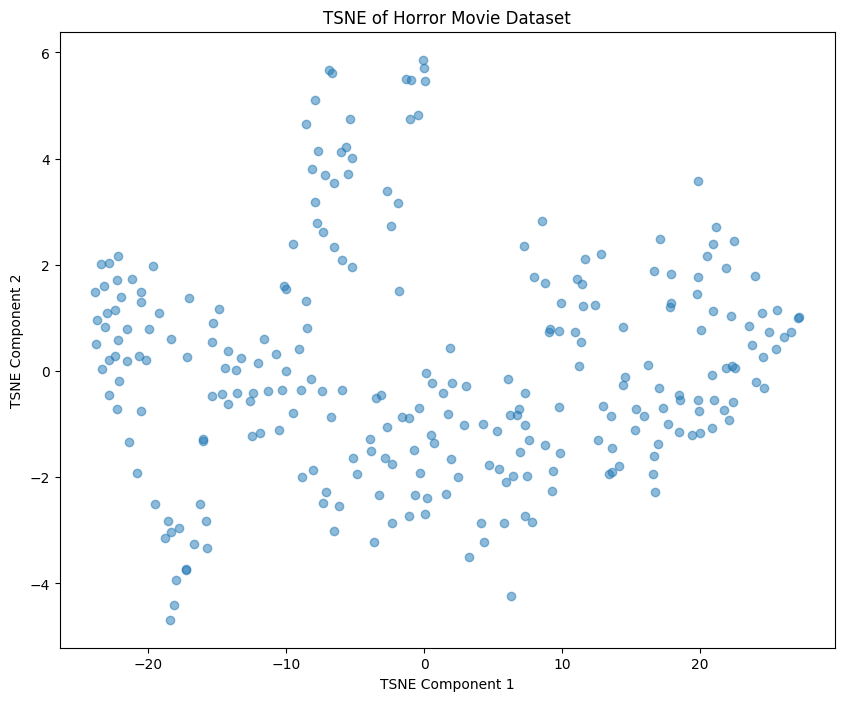

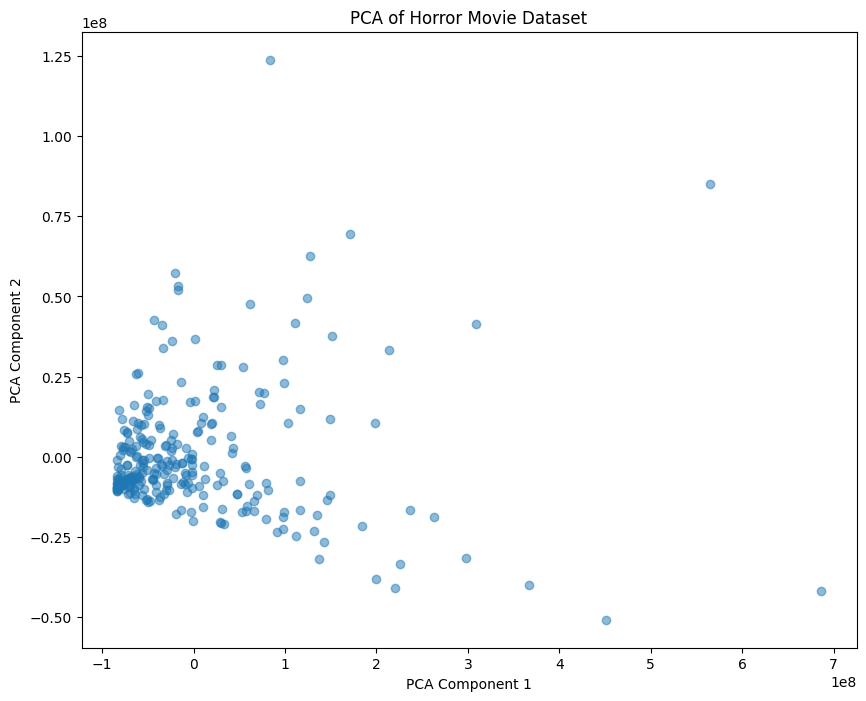

In [42]:
#plot the dataset with TSNE and PCA
tsne = TSNE(n_components=2, random_state=42)
data_horror_tsne = tsne.fit_transform(data_horror)

pca = PCA(n_components=2, random_state=42)
data_horror_pca = pca.fit_transform(data_horror)
# plot the TSNE results
plt.figure(figsize=(10, 8))
plt.scatter(data_horror_tsne[:, 0], data_horror_tsne[:, 1], alpha=0.5)
plt.title('TSNE of Horror Movie Dataset')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()
# plot the PCA results
plt.figure(figsize=(10, 8))
plt.scatter(data_horror_pca[:, 0], data_horror_pca[:, 1], alpha=0.5)
plt.title('PCA of Horror Movie Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

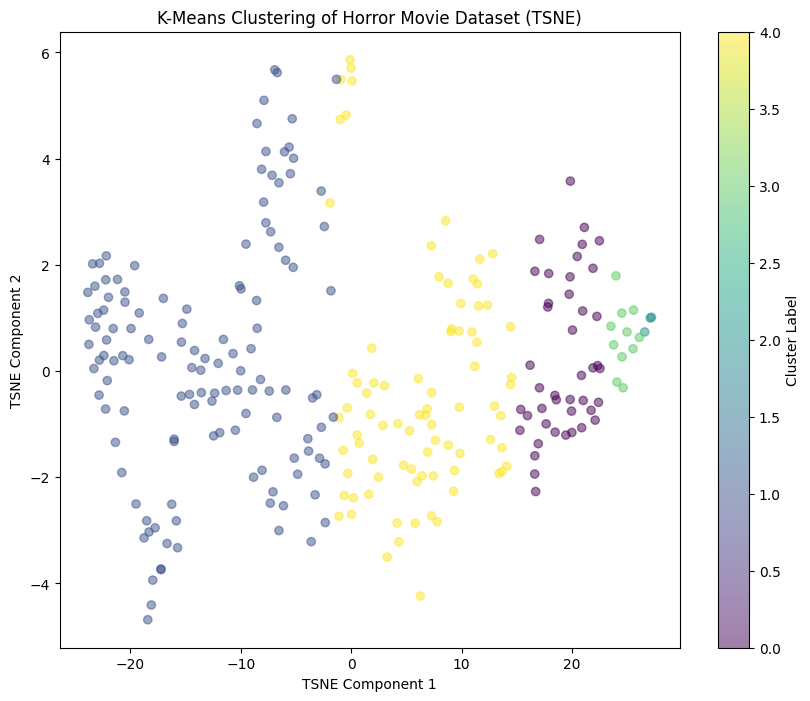

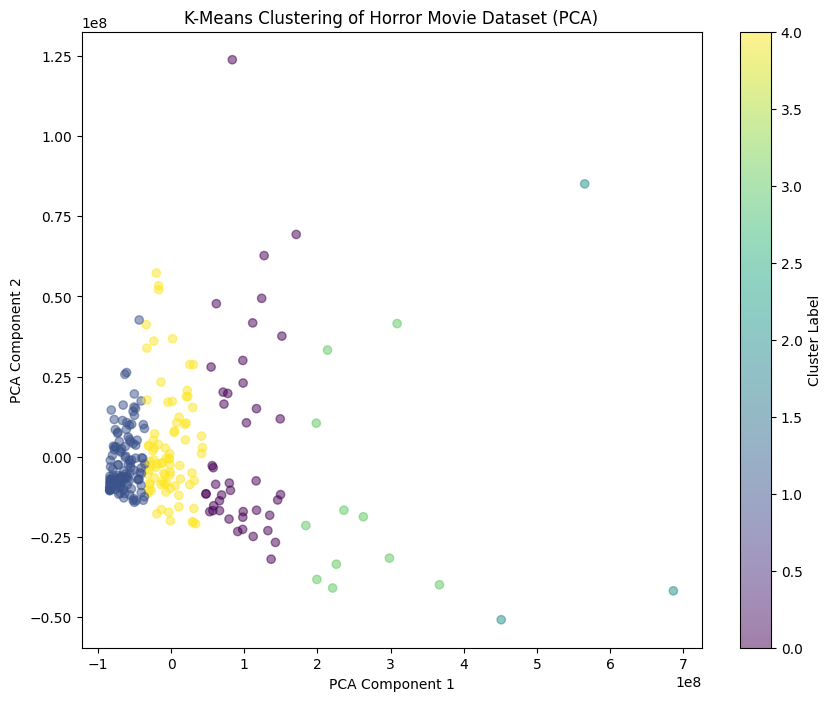

In [44]:
# run kmeans with k=4 on horror movie dataset
kmeans_horror = KMeans(n_clusters=5, random_state=42)
kmeans_horror.fit(data_horror)
# plot the k-means clustering results on TSNE
plt.figure(figsize=(10, 8))
plt.scatter(data_horror_tsne[:, 0], data_horror_tsne[:, 1], c=kmeans_horror.labels_, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering of Horror Movie Dataset (TSNE)')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.colorbar(label='Cluster Label')
plt.show()
# plot the k-means clustering results on PCA
plt.figure(figsize=(10, 8))
plt.scatter(data_horror_pca[:, 0], data_horror_pca[:, 1], c=kmeans_horror.labels_, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering of Horror Movie Dataset (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [45]:
# show centroids of horror movie clusters
centroids_horror = kmeans_horror.cluster_centers_
centroids_horror_df = pd.DataFrame(centroids_horror, columns=data_horror.columns)
centroids_horror_df

,release_date,production_budget,domestic_gross,worldwide_gross,mpaa_rating,distributor_A24,distributor_Anchor Bay Entertai…,distributor_Artisan,distributor_BH Tilt,distributor_Broad Green Pictures,...,distributor_The Bubble Factory,distributor_Third Rail,distributor_Trimark,distributor_USA Films,distributor_United Artists,distributor_Universal,distributor_Walt Disney,distributor_Warner Bros.,distributor_Weinstein/Dimension,distributor_Weinstein Co.
0,38628.930233,3.098721e+07,7.636125e+07,1.607084e+08,2.581395,-1.734723e-17,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.139535,0.000000e+00,0.093023,2.428613e-17,1.214306e-17
1,38383.409449,1.117835e+07,1.109836e+07,1.510182e+07,2.803150,3.149606e-02,3.149606e-02,0.015748,7.874016e-03,1.574803e-02,...,7.874016e-03,7.874016e-03,1.574803e-02,-1.127570e-17,-1.127570e-17,0.055118,7.874016e-03,0.062992,1.574803e-02,2.362205e-02
2,36658.333333,6.566667e+07,2.812916e+08,5.845640e+08,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.333333,0.000000e+00,0.666667,0.000000e+00,0.000000e+00
3,39395.818182,2.487273e+07,1.386995e+08,2.994247e+08,2.727273,0.000000e+00,0.000000e+00,0.090909,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.181818,0.000000e+00,0.363636,0.000000e+00,0.000000e+00
4,38766.524390,2.172927e+07,3.728489e+07,6.980057e+07,2.719512,1.219512e-02,-1.908196e-17,0.012195,-4.770490e-18,-9.540979e-18,...,-4.770490e-18,-4.770490e-18,-9.540979e-18,1.219512e-02,1.219512e-02,0.146341,-4.770490e-18,0.121951,4.878049e-02,1.908196e-17
